### Plot faculty hiring distribution by university

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir
import urllib.request
pd.set_option('display.max_columns', None)
from postdocsalary.paths import save_fig, FIGURE_DIR

<ipython-input-2-57b724ca8b01>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
joined_hires_df = pd.read_pickle(DATA_DIR / 'university_salary_hiring.pickle')

In [4]:
joined_hires_df[:3]

,Institution,n_hires_His,n_hires_CS,n_hires_Bus,total_hires,prop_hires,stripped_name,Institution_nsf_name,n_grads,prop_grads,hire_ratio,World Rank,Country,National Rank,Quality of Education Rank,Alumni Employment Rank,Quality of Faculty Rank,Research Performance Rank,Score,UNITID,INSTNM,IALIAS,ADDR,CITY,STABBR,ZIP,FIPS,OBEREG,CHFNM,CHFTITLE,GENTELE,EIN,DUNS,OPEID,OPEFLAG,WEBADDR,ADMINURL,FAIDURL,APPLURL,NPRICURL,VETURL,ATHURL,DISAURL,SECTOR,ICLEVEL,CONTROL,HLOFFER,UGOFFER,GROFFER,HDEGOFR1,DEGGRANT,HBCU,HOSPITAL,MEDICAL,TRIBAL,LOCALE,OPENPUBL,ACT,NEWID,DEATHYR,CLOSEDAT,CYACTIVE,POSTSEC,PSEFLAG,PSET4FLG,RPTMTH,INSTCAT,C18BASIC,C18IPUG,C18IPGRD,C18UGPRF,C18ENPRF,C18SZSET,C15BASIC,CCBASIC,CARNEGIE,LANDGRNT,INSTSIZE,F1SYSTYP,F1SYSNAM,F1SYSCOD,CBSA,CBSATYPE,CSA,NECTA,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,DFRCGID,DFRCUSCG,LONGITUDE,CBSA_NAME,dup,RPP_all,MEDIAN_SALARY,N_SALARIES,MEDIAN_SALARY_UPPER,MEDIAN_SALARY_LOWER,REAL_MEDIAN_SALARY,REAL_MEDIAN_SALARY_UPPER,REAL_MEDIAN_SALARY_LOWER
0,University of Chicago,240.0,28.0,264.0,532.0,0.038367,universityofchicago,University of Chicago,412.0,0.010466,3.665933,8.0,USA,6.0,8,16,27,22,91.5,144050.0,University of Chicago,,5801 S Ellis Ave,Chicago,IL,60637,17.0,3.0,Robert J. Zimmer,President,7737021234,362177139.0,005421136,177400.0,1.0,www.uchicago.edu/,collegeadmissions.uchicago.edu/,financialaid.uchicago.edu/,https://collegeadmissions.uchicago.edu/apply/,https://collegeadmissions.uchicago.edu/costs/c...,https://registrar.uchicago.edu/records/veteran...,,disabilities.uchicago.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,11.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,16980,1,176,-2.0,17031,Cook County,1701.0,-87.599539,41.787994,96.0,1.0,-87.599539,"Chicago-Naperville-Elgin, IL-IN-WI",False,102.8,57765.712798,699,59366.358609,56987.933045,56192.327624,57749.376079,55435.732534
1,Yale University,307.0,47.0,121.0,475.0,0.034256,yaleuniversity,Yale University,393.0,0.009983,3.431398,10.0,USA,8.0,6,36,13,20,90.7,130794.0,Yale University,,Woodbridge Hall,New Haven,CT,06520,9.0,1.0,Peter Salovey,President,2034324771,60646973.0,043207562,142600.0,1.0,https://www.yale.edu/,https://admissions.yale.edu/,https://finaid.yale.edu/,https://admissions.yale.edu/first-year-applica...,https://admissions.yale.edu/estimate-your-cost,finaid.yale.edu/costs-affordability/types-aid/...,yalebulldogs.com/documents/2019/7/18//Athletic...,https://sas.yale.edu/,2.0,1.0,2.0,9.0,1.0,1.0,11.0,1.0,2.0,2.0,1.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,8.0,14.0,14.0,6.0,17.0,15.0,15.0,15.0,2.0,4.0,2.0,-2,-2.0,35300,1,408,75700.0,9009,New Haven County,903.0,-72.926688,41.311158,96.0,1.0,-72.926688,"New Haven-Milford, CT",False,106.2,53631.976988,583,54242.856101,53165.480709,50500.919951,51076.135688,50061.657918
2,Massachusetts Institute of Technology,10.0,299.0,364.0,673.0,0.048536,massachusettsinstituteoftechnology,Massachusetts Institute of Technology,587.0,0.014911,3.254970,2.0,USA,2.0,4,12,2,8,96.7,166683.0,Massachusetts Institute of Technology,"MIT, M.I.T.",77 Massachusetts Avenue,Cambridge,MA,02139-4307,25.0,1.0,L. Rafael Reif,President,6172531000,42103594.0,001425594,217800.0,1.0,web.mit.edu/,https://mitadmissions.org/,https://sfs.mit.edu/,my.mit.edu/,https://sfs.mit.edu/undergraduate-students/our...,https://sfs.mit.edu/undergraduate-students/typ...,,studentlife.mit.edu/das,2.0,1.0,2.0,9.0,1.0,1.0,12.0,1.0,2.0,2.0,2.0,2.0,12.0,1.0,A,-2.0,-2.0,-2,1.0,1.0,1.0,1.0,1.0,2.0,15.0,14.0,15.0,14.0,6.0,17.0,15.0,15.0,15.0,1.0,4.0,2.0,-2,-2.0,14460,1,148,71650.0,25017,Middlesex County,2507.0,-71.093226,42.359243,96.0,1.0,-71.093226,"Boston-Cambridge-Newton, MA-NH",False,115.5,56659.816586,680,56950.613563,56164.312487,49056.118257,49307.890531,48627.110378


In [5]:
import seaborn as sns

In [6]:
pal = sns.color_palette('Set1', 10)
pal

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6),
 (0.8941176470588236, 0.10196078431372549, 0.10980392156862745)]

### Top cities by RPP

In [7]:
nex = 10
top_n = len(joined_hires_df)

In [8]:
np.min(joined_hires_df["hire_ratio"].values), np.max(joined_hires_df["hire_ratio"].values)

(0.0, 3.6659328748534867)

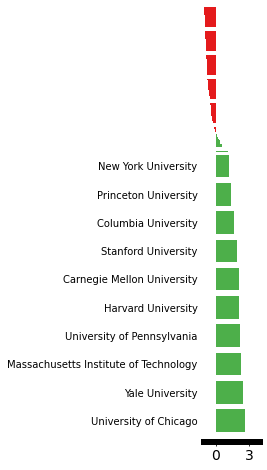

In [9]:
xlim = [-1 , 4]

sort_mask = np.argsort(joined_hires_df["hire_ratio"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(1, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = joined_hires_df["hire_ratio"].values[sort_mask][nex:top_n] -1
ax.barh(
    np.arange(len(joined_hires_df))[nex:top_n],
    y,
    color=[pal[2] if i > 0 else pal[0] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = joined_hires_df["hire_ratio"].values[sort_mask][:nex] -1 
ax.barh(
    np.arange(len(joined_hires_df))[:nex] + 1,
    y,
    color=[pal[2] if i > 0 else pal[0] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if True:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{}".format(i)
        for i in 
            joined_hires_df["Institution"].values[sort_mask][:nex]
        

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(joined_hires_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(6)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
ax.set_xticks([0,3])
save_fig(FIGURE_DIR / 'university_hire_ratio')

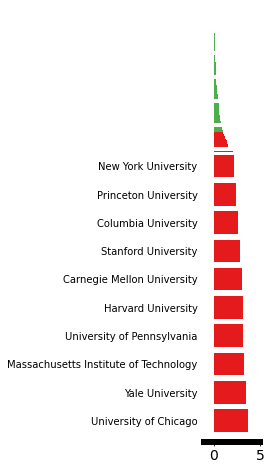

In [10]:
xlim = [-1 , 5]

sort_mask = np.argsort(joined_hires_df["hire_ratio"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(1, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
y = joined_hires_df["hire_ratio"].values[sort_mask][nex:top_n]
ax.barh(
    np.arange(len(joined_hires_df))[nex:top_n],
    y,
    color=[pal[0] if i > 1 else pal[2] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = joined_hires_df["hire_ratio"].values[sort_mask][:nex] 
ax.barh(
    np.arange(len(joined_hires_df))[:nex] + 1,
    y,
    color=[pal[0] if i > 1 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if True:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{}".format(i)
        for i in 
            joined_hires_df["Institution"].values[sort_mask][:nex]
        

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
# ax.set_yticklabels(joined_hires_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(6)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
save_fig(FIGURE_DIR / 'university_hire_ratio2')

In [11]:
overall_median_salary = 53100.08961257449
overall_median_real_salary = 51848.669708466055

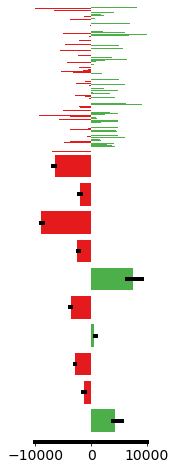

In [13]:
xlim = [-10000, 10000]
metric = "REAL_MEDIAN_SALARY"
sort_mask = np.argsort(joined_hires_df["hire_ratio"].values)[::-1]
fig, axs = plt.subplots(
    nrows=2,
    figsize=(2, 8),
    gridspec_kw={"wspace": 0, "hspace": 0, "height_ratios": [1, 2]},
)

ax = axs[0]
#ax.axvline(0, color='k', lw=3)

y = joined_hires_df[metric].values[sort_mask][nex:top_n] - overall_median_real_salary
ax.barh(
    np.arange(len(joined_hires_df))[nex:top_n],
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
ax.set_xlim(xlim)
ax.set_ylim([nex, top_n])
# ax.set_xticks([])
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.set_yticks([])
ax.set_xticks([])

ax = axs[1]
y = joined_hires_df[metric].values[sort_mask][:nex] - overall_median_real_salary
ax.barh(
    np.arange(len(joined_hires_df))[:nex] + 1,
    y,
    color=[pal[0] if np.sign(i) < 0 else pal[2] for i in y],
)
[i.set_linewidth(0.0) for i in ax.spines.values()]
ax.tick_params(left=False)
# ax.axvline(0, color="k", ls="dashed")
# ax.set_xlabel('University ranking (ranked)')
# ax.set_ylabel('Regional salary value relative median ($)')
# ax.set_yscale('log')
ax.set_xlim(xlim)
ax.set_ylim([0.25, nex + 0.5])
# ax.set_xticks([])
if False:
    ax.set_yticks(np.arange(1, nex + 1))
    names = [
        "{} ($n$={})".format(i, j)
        for i, j in zip(
            joined_hires_df["CBSA_NAME"].values[sort_mask][:nex],
            joined_hires_df["total_hires"].values[sort_mask][:nex],
        )

    ]
    ax.set_yticklabels(names)
else:
    ax.set_yticks([])
    
xerr = np.array((
        y+ overall_median_real_salary - joined_hires_df.REAL_MEDIAN_SALARY_LOWER.values[sort_mask][
            :nex
        ],
        y +overall_median_real_salary- joined_hires_df.REAL_MEDIAN_SALARY_UPPER.values[sort_mask][
            :nex
        ],
    ))
xerr[1,:] *= -1
ax.errorbar(
    y,
    np.arange(len(joined_hires_df))[:nex] + 1,
    xerr=xerr,
    ls='none',
    color = 'k',
    lw = 4
    
)
    
# ax.set_yticklabels(joined_hires_df["institution"].values[sort_mask][:20])
ax.spines["bottom"].set_linewidth(4)
ax.xaxis.set_tick_params(labelsize=14)
#ax.set_xticks([-10000, -5000, 0, 5000, 10000])
#ax.set_xticklabels(["-$10k", "-$5k", "$0", "$5k", "$10k"])
#ax.axvline(0, color='k', lw=3)

save_fig(FIGURE_DIR / 'uni_real_salary')